# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mplt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')
df.head(20)
#df.sample(20)[['TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']]
#print(df.shape)
#df.count()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [5]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
print(df.shape)
df.isna().sum()

(1715, 25)


PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [6]:
#Particularly want to assess impact of expenditure/revenue on average grade 4 math scores.
#Must drop all rows where grade 4 math scores are missing
#Don't really care about missing scores on other tests
#Going to try to fill in expenditure values when possible
#Also going to try to fill in enrollment values for grade 4

df.dropna(subset = ['AVG_MATH_4_SCORE'], inplace = True)
#Whenever Total Revenue is na, so are all the other revenue components, so can't really do any filling in there
#df.dropna(subset = ['TOTAL_REVENUE'], inplace = True)
#For Expenditure the same is more or less true, however, we can try to fill in some other_expenditure values.
#df.dropna(subset = ['TOTAL_EXPENDITURE'], inplace = True)
print(((df["TOTAL_EXPENDITURE"]-df["INSTRUCTION_EXPENDITURE"]-df["SUPPORT_SERVICES_EXPENDITURE"]-df["OTHER_EXPENDITURE"]-df["CAPITAL_OUTLAY_EXPENDITURE"])/df["TOTAL_EXPENDITURE"]*100).describe())
#It turns out total expenditure is roughly equal to the sum of the other expenditures, so for the rows where only
#other_expenditure is missing, we can fill those in.
df['OTHER_EXPENDITURE'] = df['OTHER_EXPENDITURE'].fillna(df["TOTAL_EXPENDITURE"]-df["INSTRUCTION_EXPENDITURE"]-df["SUPPORT_SERVICES_EXPENDITURE"]-df["CAPITAL_OUTLAY_EXPENDITURE"])

count    398.000000
mean       4.117090
std        3.213477
min        0.000000
25%        2.351435
50%        3.466629
75%        5.218376
max       25.096272
dtype: float64


In [7]:
#Now just going to briefly deal with grade 4 enrollments and total enrollments
print(((df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"])/df["ENROLL_ALL"]*100).describe())
#first recover enroll_primary values
df['ENROLL_PRIMARY'] = df['ENROLL_PRIMARY'].fillna(df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_HS"])
#next try to figure out what missing enroll_4 values should be, suspect it should be some const * (4+8+12)
print((df["ENROLL_PRIMARY"]/df["ENROLL_4"]).describe())
#looks like it's around total primary enrollment/8
df['ENROLL_4'] = df['ENROLL_4'].fillna(df["ENROLL_PRIMARY"]/8.056)
df.shape


count    395.000000
mean       0.425560
std        1.094481
min        0.000000
25%        0.000000
50%        0.000000
75%        0.190198
max        7.702014
dtype: float64
count    449.000000
mean       8.029470
std        0.196473
min        7.089194
25%        7.918827
50%        8.037053
75%        8.152921
max        8.931621
dtype: float64


(565, 25)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math Scores*

How many years of data are logged in our dataset? 

In [8]:
df['YEAR'].nunique()

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [9]:
print('Michigan:', df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean())
print('Ohio:', df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean())
print('Unfortunately it looks like Ohio wins this one')

Michigan: 234.36363636363637
Ohio: 239.45454545454547
Unfortunately it looks like Ohio wins this one


Find the average for your outcome score across all states in 2019

In [10]:
df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()

239.9433962264151

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [11]:
df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [19]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
#df[['TOTAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE']].sample(20)
df['PRIORITY'] = df['TOTAL_EXPENDITURE']/df['TOTAL_REVENUE']
df['RATIO'] = df['INSTRUCTION_EXPENDITURE']/df['SUPPORT_SERVICES_EXPENDITURE']

Feature engineering justification: **Expenditure per student is probably a better feature than expenditure alone, since more populous states probably have higher expenditure but distributed among more students. I also made a priority column to see how much a state cares about education (so if they are overspending or underspending their eductation revenue), and also a ratio column to see if the balance between instruction and support expenditure affects test scores.**

**Not going to normalize/standardize since I plan to use a regression model, and standardization usually isn't that helpful there anyways.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:title={'center':'Distribution of 4th Grade Math Scores'}, ylabel='Frequency'>

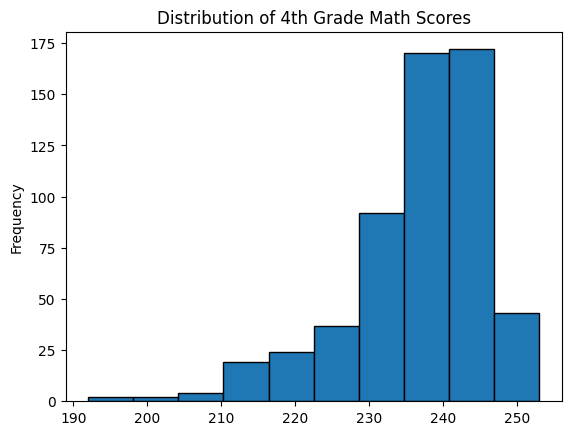

In [21]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

<AxesSubplot:xlabel='YEAR'>

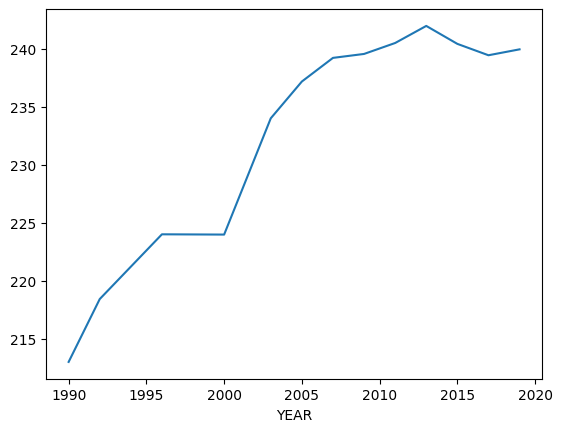

In [22]:
df.groupby('YEAR')["AVG_MATH_4_SCORE"].mean().plot()

We see a clear time dependence in the test scores. This time dependence more or less stops after 2007. We would like to not include any time dependence bias in our data, so we remove rows where year is before 2007. We are still left with enough rows. Also going to drop rows where expenditure is na

In [31]:
df2 = df[df['YEAR'] >= 2007].copy()
df2.dropna(subset = ['TOTAL_EXPENDITURE'], inplace=True)

<AxesSubplot:xlabel='TOTAL_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

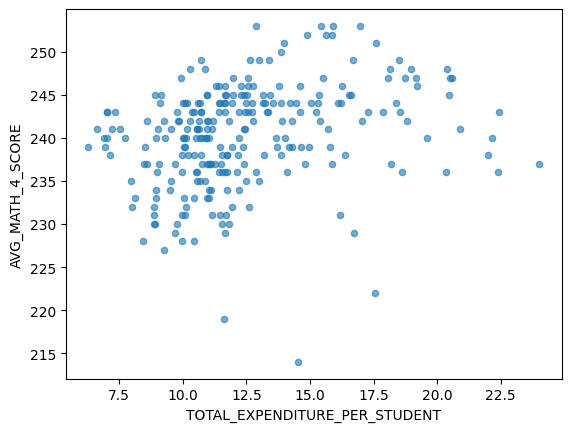

In [38]:
df2.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)

**Total expenditure per student vs average 4th grade math score - moderate positive correlation**

**Visualization 2**

<AxesSubplot:xlabel='PRIORITY', ylabel='AVG_MATH_4_SCORE'>

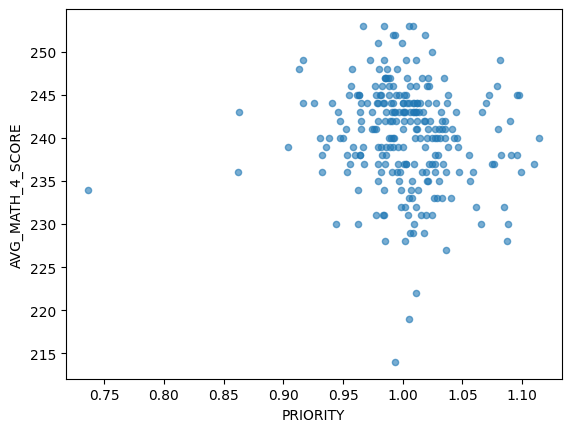

In [39]:
df2.plot.scatter(x='PRIORITY', y='AVG_MATH_4_SCORE', alpha=0.6)

**Education priority (education spending/education revenue) vs 4th grade math score - weak correlation if any**

<AxesSubplot:xlabel='RATIO', ylabel='AVG_MATH_4_SCORE'>

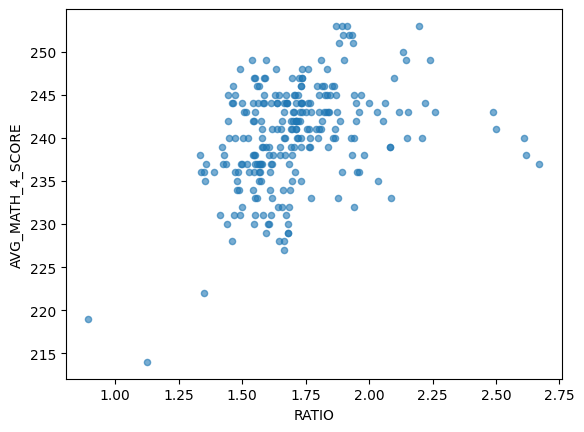

In [40]:
df2.plot.scatter(x='RATIO', y='AVG_MATH_4_SCORE', alpha=0.6)

**Viz 3: With the ratio we do actually see a stronger positive correlation. Ratio is instructional spending/support**

<AxesSubplot:xlabel='LOG_ENROLL_4', ylabel='AVG_MATH_4_SCORE'>

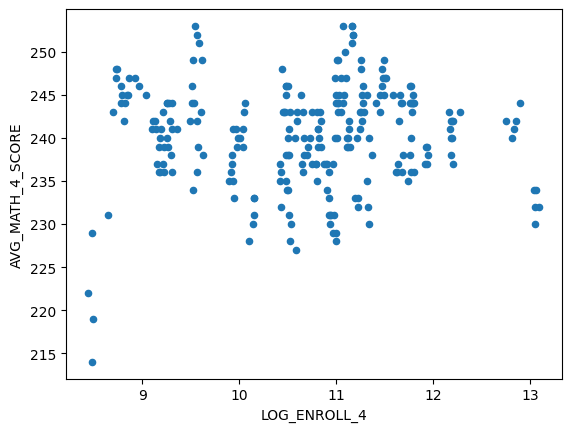

In [42]:
df2['LOG_ENROLL_4'] = np.log(df2['ENROLL_4'])
df2.plot.scatter(x='LOG_ENROLL_4', y='AVG_MATH_4_SCORE')

**Again no obvious relationship between 4th grade enrollment and test scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [43]:
from sklearn.model_selection import train_test_split

In [49]:
X = df2[['TOTAL_EXPENDITURE_PER_STUDENT','RATIO']].dropna()
y = df2.loc[X.index]['AVG_MATH_4_SCORE']
#There are no na values in y
y.isna().sum()

0

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [115]:
# import your sklearn class here
from sklearn.neural_network import MLPRegressor #trying out a more powerful model
from sklearn.linear_model import LinearRegression

In [125]:
# create your model here
model = MLPRegressor(hidden_layer_sizes = (100,500,200,100), activation = 'relu', solver = 'lbfgs', max_iter = 10000)
model2 = LinearRegression()

In [126]:
model.fit(X_train, y_train)
model2.fit(X_train, y_train)

LinearRegression()

In [127]:
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [143]:
print('Neural Net Stats (Training RMSE, Test MAD, Test RMSE)')
print(np.mean((model.predict(X_train)-y_train)**2)**0.5) #training error neural network model
print(np.mean(np.abs(model.predict(X_test)-y_test))) #MAD
print(np.mean((model.predict(X_test)-y_test)**2)**0.5) #RMSE
print('-----------------')
print('Linear Regression Stats')
print(np.mean((model2.predict(X_train)-y_train)**2)**0.5) #training error linear regression model
print(np.mean(np.abs(model2.predict(X_test)-y_test))) #MAD
print(np.mean((model2.predict(X_test)-y_test)**2)**0.5) #RMSE
print('-----------------')
print('Linear Regression Coefficients (intercept, coefs, R^2):')
print(model2.intercept_)
print(model2.coef_)
print(model.score(X_test, y_test))

Neural Net Stats (Training RMSE, Test MAD, Test RMSE)
5.289066407025521
4.174193888803125
5.119564381751212
-----------------
Linear Regression Stats
5.410395196397683
4.297860548140819
5.250301053267611
-----------------
Linear Regression Coefficients (intercept, coefs, R^2):
219.7872704890617
[0.33793149 9.44392957]
0.18302031862581314


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

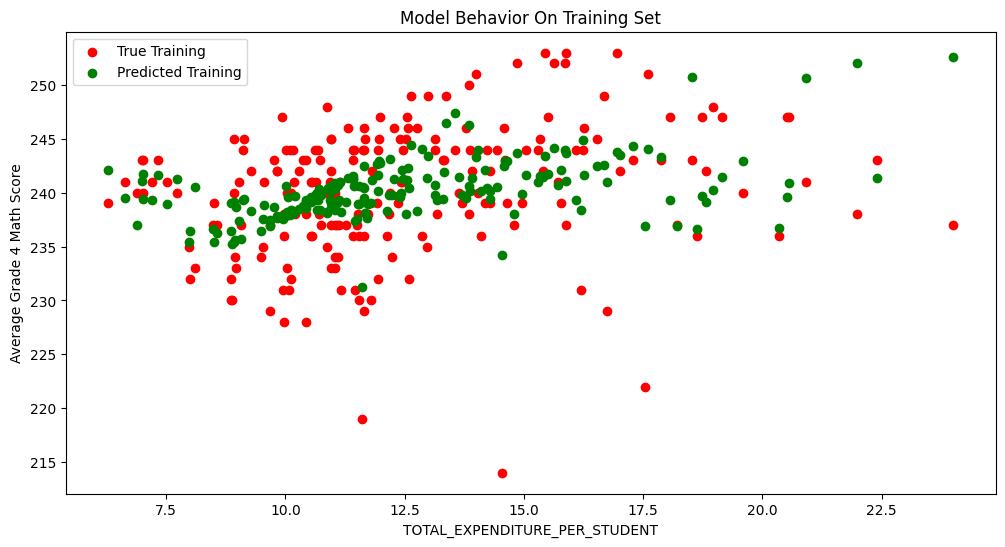

In [137]:
import matplotlib.pyplot as plt
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

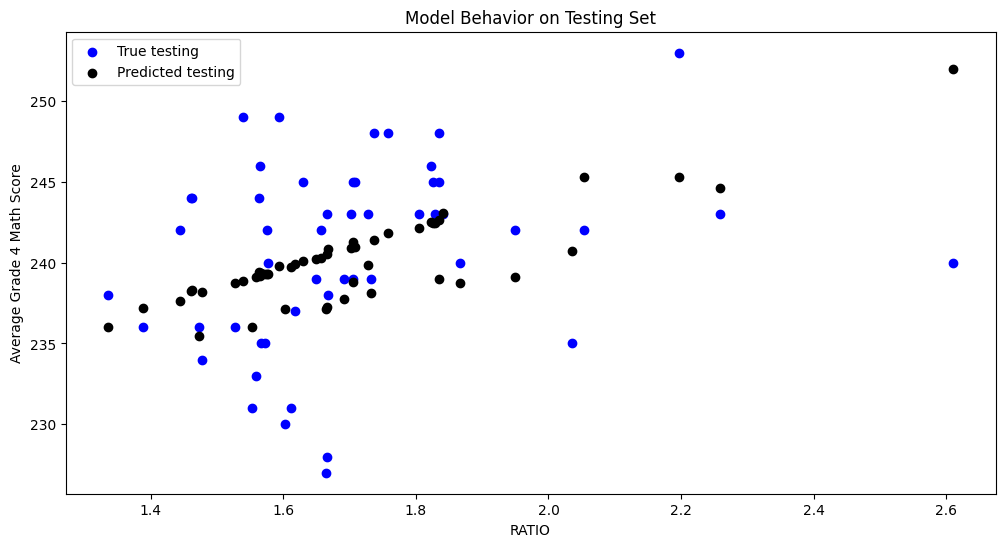

In [136]:
col_name = 'RATIO'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Grade 4 Math Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

I trained two models to predict average grade 4 math scores for any state in years since 2007, given data on that state's expenditure per student and ratio of instruction expenditure to support expenditure. 

I used both a linear regression model and a neural network to fit the data. As expected, I find that both the total expenditure per student and the ratio of instructional to support spending are positively correlated with grade 4 math score results. When using just these two variables as predictors, both models to a decent job of predicting the student's test result (within an average of around 5 points when measured by root mean squared error). I know the relationship is positive due to the positive regression coefficients. The R^2 value isn't high (0.183) but given how high-level these predictors are, it makes sense that there is still a lot of variance remaining outside the model. In general, I expect the results to be less accurate than the tutorial, for example, since I did not use the other highly correlated test scores to do the prediction and instead tried to build a more causative model. Still, both models at least do a decent job of getting in the neighborhood of the scoring range, given expenditure and ratio data.

The neural network was only a little better than the linear model, which makes sense, since the true relationship is likely linear (based on the scatterplots) except for very high values of expenditure per student and ratio, where there are diminishing returns. However, neural network models have no interpretability so it may be worth it to sacrifice this small gain in accuracy in order to have a model that makes more sense. Since the performances are close, both models might make sense, depending on the situation.